In [46]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange, tqdm
import torch
import torchvision
import sys
sys.path.insert(0, "../")
import mytorch
from mytorch.tensor import Tensor
from mytorch import nn

In [128]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The aim of this notebook is to recreate the pytorch_mnist notebook using mytorch

### Load data

I'll use torchvision to load the data just for convenience, all training will be done using only mytorch and numpy

In [25]:
train_batch_size = 64
test_batch_size = 64

In [26]:
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./datasets', train=True, download=True,
                              transform=torchvision.transforms.Compose([
                                  torchvision.transforms.ToTensor(),
                                  torchvision.transforms.Normalize(0, 1)
                              ])),
    batch_size=train_batch_size, shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./datasets', train=False, download=True,
                              transform=torchvision.transforms.Compose([
                                  torchvision.transforms.ToTensor(),
                                  torchvision.transforms.Normalize(0, 1)
                              ])),
    batch_size=test_batch_size, shuffle=True
)

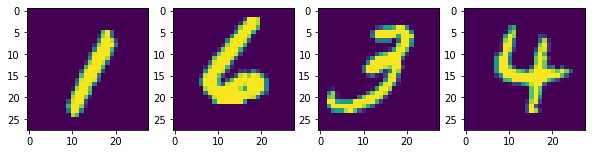

In [27]:
# visualize some images
train_iter = iter(train_loader)
images, labels = train_iter.next()
plt.figure(figsize=(10,8))
for i in range(4):
    ax = plt.subplot(1, 4, i+1)
    ax.imshow(images[i].reshape(28, 28))

### Build simple neural network using mytorch

In [140]:
class Model(nn.Module):
    def __init__(self):
        self.fc1 = nn.Linear(784, 200)
        self.fc2 = nn.Linear(200, 10)
        
    def forward(self, inputs):
        h1 = self.fc1(inputs)
        a1 = nn.Relu()(h1)
        return self.fc2(a1)

In [141]:
model = Model()

In [142]:
lr = 0.01
losses = []
accuracies = []
for epoch in range(3):
    total_loss = 0
    total_accuracy = 0
    for i, data in tqdm(enumerate(train_loader)):
        images, labels = data
        images = images.numpy() #(64, 1, 28, 28)
        if images.shape[0] != train_batch_size:
            continue
        labels = Tensor(labels.numpy()) #(64,)
        batch_size = images.shape[0]
        
        # forward pass
        images = Tensor(images.reshape(batch_size, -1))
        outputs = model(images)
        
        # calculate loss
        cross_entropy_loss = nn.CrossEntropyLoss()
        loss = cross_entropy_loss(outputs, labels)
        losses.append(loss.data)
        total_loss += loss.data
        
        # calculate accuracy
        accuracy = (np.argmax(outputs.data, axis=1) == labels.data).sum() / labels.shape[0]
        accuracies.append(accuracy)
        total_accuracy += accuracy
        
        # backward pass, compute gradients
        loss.backward()
        
        # SGD update weights
#         W1.data = W1.data - lr * W1.grad
#         W2.data = W2.data - lr * W2.grad
#         b1.data = b1.data - lr * b1.grad
#         b2.data = b2.data - lr * b2.grad
#         print(W1.shape, W2.shape, b1.shape, b2.shape)
    print(f'Epoch {epoch+1}, Loss: {total_loss/(i+1)}, Accuracy: {total_accuracy/(i+1)}')

938it [00:14, 65.07it/s]
6it [00:00, 59.49it/s]

Epoch 1, Loss: 123.49416825021679, Accuracy: 0.10379464285714286


938it [00:13, 67.77it/s]
5it [00:00, 45.03it/s]

Epoch 2, Loss: 123.49204933286764, Accuracy: 0.10376132729211088


938it [00:15, 59.69it/s]

Epoch 3, Loss: 123.47520612861686, Accuracy: 0.10381130063965885


In [129]:
def initialize_weights():
    # weights and bias for each layer
    return [Tensor(np.random.randn(784, 200), requires_grad=True), Tensor(np.random.randn(200,), requires_grad=True), 
            Tensor(np.random.randn(200, 10), requires_grad=True), Tensor(np.random.randn(10,), requires_grad=True)]

In [130]:
W1, b1, W2, b2 = initialize_weights()
lr = 0.01
losses = []
accuracies = []
for epoch in range(3):
    total_loss = 0
    total_accuracy = 0
    for i, data in tqdm(enumerate(train_loader)):
        images, labels = data
        images = images.numpy() #(64, 1, 28, 28)
        if images.shape[0] != train_batch_size:
            continue
        labels = Tensor(labels.numpy()) #(64,)
        batch_size = images.shape[0]
        
        # forward pass
        images = Tensor(images.reshape(batch_size, -1))
        H1 = images.dot(W1) + b1 # (64, 200)
        relu = nn.Relu()
        A1 = relu(H1) # (64, 200)
        H2 = A1.dot(W2) + b2 # (64, 10)
        
        # calculate loss
        cross_entropy_loss = nn.CrossEntropyLoss()
        loss = cross_entropy_loss(H2, labels)
        losses.append(loss.data)
        total_loss += loss.data
        
        # calculate accuracy
        accuracy = (np.argmax(H2.data, axis=1) == labels.data).sum() / labels.shape[0]
        accuracies.append(accuracy)
        total_accuracy += accuracy
        
        # backward pass, compute gradients
        loss.backward()
        
        # SGD update weights
        W1.data = W1.data - lr * W1.grad
        W2.data = W2.data - lr * W2.grad
        b1.data = b1.data - lr * b1.grad
        b2.data = b2.data - lr * b2.grad
#         print(W1.shape, W2.shape, b1.shape, b2.shape)
    print(f'Epoch {epoch+1}, Loss: {total_loss/(i+1)}, Accuracy: {total_accuracy/(i+1)}')

0it [00:00, ?it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


4it [00:00, 31.71it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


7it [00:00, 27.45it/s]

Length of graph***********: 10
Length of graph***********: 10


11it [00:00, 29.65it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


14it [00:00, 28.42it/s]

Length of graph***********: 10
Length of graph***********: 10


18it [00:00, 30.10it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


21it [00:00, 28.45it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


24it [00:00, 28.28it/s]

Length of graph***********: 10
Length of graph***********: 10


28it [00:00, 30.48it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


33it [00:01, 34.15it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


37it [00:01, 32.60it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


42it [00:01, 35.74it/s]

Length of graph***********: 10


46it [00:01, 35.93it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10

51it [00:01, 37.77it/s]


Length of graph***********: 10


56it [00:01, 39.44it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


61it [00:01, 37.92it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


66it [00:01, 38.95it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


70it [00:02, 35.39it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


74it [00:02, 33.27it/s]

Length of graph***********: 10
Length of graph***********: 10


78it [00:02, 33.84it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


83it [00:02, 37.20it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


89it [00:02, 41.45it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


94it [00:02, 41.60it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


99it [00:02, 39.12it/s]

Length of graph***********: 10


104it [00:02, 36.36it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


110it [00:03, 39.99it/s]

Length of graph***********: 10
Length of graph***********: 10


116it [00:03, 43.59it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


122it [00:03, 45.84it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


128it [00:03, 47.47it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


133it [00:03, 45.08it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


139it [00:03, 47.61it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


144it [00:03, 46.43it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 

149it [00:03, 45.25it/s]

10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


154it [00:03, 44.20it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


159it [00:04, 42.37it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


164it [00:04, 42.70it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


169it [00:04, 42.53it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


174it [00:04, 40.94it/s]

Length of graph***********: 10
Length of graph***********: 10


179it [00:04, 42.26it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


185it [00:04, 44.07it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


190it [00:04, 45.25it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


195it [00:04, 45.22it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


200it [00:05, 45.31it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


205it [00:05, 45.77it/s]

Length of graph***********: 10
Length of graph***********: 10


210it [00:05, 45.98it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


215it [00:05, 45.69it/s]

Length of graph***********: 10
Length of graph***********: 10


220it [00:05, 46.38it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


225it [00:05, 46.33it/s]

Length of graph***********: 10
Length of graph***********: 10


231it [00:05, 47.96it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


237it [00:05, 49.07it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


243it [00:05, 49.33it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


248it [00:05, 49.38it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


254it [00:06, 52.04it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


260it [00:06, 51.20it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


266it [00:06, 48.73it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


271it [00:06, 47.22it/s]

Length of graph***********: 10
Length of graph***********: 10


276it [00:06, 47.01it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


282it [00:06, 47.81it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


287it [00:06, 44.61it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


292it [00:06, 42.99it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


297it [00:07, 43.18it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


302it [00:07, 43.73it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


308it [00:07, 45.40it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


313it [00:07, 45.32it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


318it [00:07, 46.48it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


323it [00:07, 45.14it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


334it [00:07, 46.30it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


346it [00:08, 49.14it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


351it [00:08, 46.51it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


356it [00:08, 46.55it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


367it [00:08, 50.00it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


373it [00:08, 50.46it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


379it [00:08, 51.34it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


385it [00:08, 50.85it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


391it [00:09, 49.11it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


396it [00:09, 47.42it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


401it [00:09, 47.80it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


406it [00:09, 46.97it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


411it [00:09, 46.28it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


416it [00:09, 45.83it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


421it [00:09, 45.10it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


426it [00:09, 45.72it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


431it [00:09, 46.67it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


436it [00:09, 47.52it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


441it [00:10, 47.83it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


446it [00:10, 47.45it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


452it [00:10, 49.03it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10

457it [00:10, 47.40it/s]


Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


462it [00:10, 46.47it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


468it [00:10, 47.90it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


473it [00:10, 48.28it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


479it [00:10, 49.49it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


484it [00:10, 48.87it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


489it [00:11, 48.32it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


494it [00:11, 47.38it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


499it [00:11, 47.37it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


504it [00:11, 46.72it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


509it [00:11, 46.98it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


514it [00:11, 47.01it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


520it [00:11, 48.35it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


531it [00:11, 50.90it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


537it [00:12, 48.57it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


542it [00:12, 44.54it/s]

Length of graph***********: 10
Length of graph***********: 10


547it [00:12, 40.10it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


552it [00:12, 35.10it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


558it [00:12, 38.73it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


563it [00:12, 40.25it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


568it [00:12, 41.45it/s]

Length of graph***********: 10
Length of graph***********: 10


573it [00:12, 42.96it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


578it [00:13, 44.32it/s]

Length of graph***********: 10
Length of graph***********: 10


584it [00:13, 46.60it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


595it [00:13, 42.31it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


606it [00:13, 45.80it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


611it [00:13, 42.04it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


621it [00:14, 39.09it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


626it [00:14, 36.56it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


636it [00:14, 37.16it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


648it [00:14, 43.36it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


660it [00:14, 48.75it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


666it [00:15, 50.04it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


672it [00:15, 47.24it/s]

Length of graph***********: 10


677it [00:15, 46.16it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


687it [00:15, 44.51it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 

697it [00:15, 42.29it/s]

10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


702it [00:15, 41.32it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


707it [00:16, 40.55it/s]

Length of graph***********: 10


712it [00:16, 42.45it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


718it [00:16, 44.79it/s]

Length of graph***********: 10


723it [00:16, 45.47it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


729it [00:16, 48.26it/s]

Length of graph***********: 10


734it [00:16, 45.86it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 

739it [00:16, 47.01it/s]

10
Length of graph***********: 10


744it [00:16, 46.48it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


749it [00:16, 46.89it/s]

Length of graph***********: 10
Length of graph***********: 10


754it [00:17, 46.74it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


759it [00:17, 47.22it/s]

Length of graph***********: 10
Length of graph***********: 10


764it [00:17, 47.86it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


769it [00:17, 46.53it/s]

Length of graph***********: 10
Length of graph***********: 10


774it [00:17, 46.95it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


779it [00:17, 46.66it/s]

Length of graph***********: 10
Length of graph***********: 10


784it [00:17, 46.54it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


789it [00:17, 46.68it/s]

Length of graph***********: 10
Length of graph***********: 10


795it [00:17, 49.06it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


801it [00:18, 51.10it/s]

Length of graph***********: 10
Length of graph***********: 10


807it [00:18, 50.39it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


819it [00:18, 50.33it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


825it [00:18, 49.08it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


831it [00:18, 49.69it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


836it [00:18, 49.10it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


841it [00:18, 49.35it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


847it [00:18, 51.43it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


853it [00:19, 51.08it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


859it [00:19, 48.52it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


869it [00:19, 46.66it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


879it [00:19, 46.85it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


889it [00:19, 46.60it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


900it [00:20, 48.57it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


912it [00:20, 50.29it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


918it [00:20, 49.09it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


924it [00:20, 49.90it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


930it [00:20, 51.34it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


936it [00:20, 49.49it/s]

Length of graph***********: 10
Length of graph***********: 10


938it [00:20, 44.95it/s]
4it [00:00, 38.25it/s]

Length of graph***********: 10
Epoch 1, Loss: 12.276232663645054, Accuracy: 0.7105043976545842
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


14it [00:00, 41.69it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


20it [00:00, 44.68it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


25it [00:00, 45.08it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


36it [00:00, 47.85it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


46it [00:00, 45.86it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


51it [00:01, 43.54it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


57it [00:01, 45.59it/s]

Length of graph***********: 10


62it [00:01, 43.77it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


72it [00:01, 44.56it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


82it [00:01, 44.01it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


87it [00:01, 45.01it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


92it [00:02, 43.03it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


98it [00:02, 44.68it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


104it [00:02, 46.90it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


109it [00:02, 46.24it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


114it [00:02, 43.68it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


119it [00:02, 43.80it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


124it [00:02, 43.98it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


129it [00:02, 43.50it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


134it [00:02, 41.58it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


139it [00:03, 41.92it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


144it [00:03, 41.85it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


149it [00:03, 40.50it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


154it [00:03, 40.58it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


159it [00:03, 40.49it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


164it [00:03, 40.35it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 

169it [00:03, 39.34it/s]

10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


174it [00:03, 39.61it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


179it [00:04, 39.80it/s]

Length of graph***********: 10
Length of graph***********: 10


188it [00:04, 40.81it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


199it [00:04, 46.30it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


204it [00:04, 45.07it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


210it [00:04, 47.92it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


220it [00:04, 47.38it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


225it [00:05, 45.71it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


231it [00:05, 47.52it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


241it [00:05, 47.99it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


251it [00:05, 46.92it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


262it [00:05, 48.30it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


272it [00:06, 48.37it/s]

Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10
Length of graph***********: 10


273it [00:06, 44.67it/s]

Length of graph***********: 10


KeyboardInterrupt: 

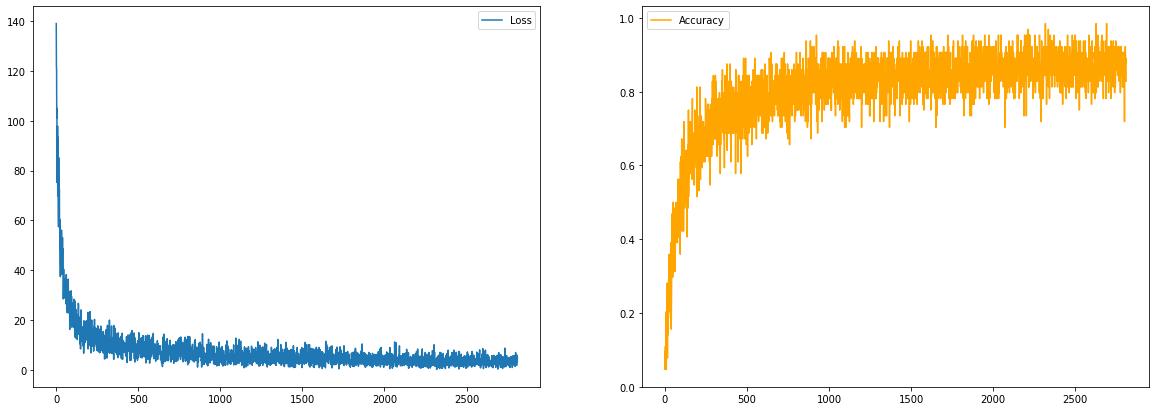

In [57]:
plt.figure(figsize=(20,7))
ax1 = plt.subplot(1, 2, 1)
ax1.plot(losses)
ax1.legend(['Loss'])
ax2 = plt.subplot(1, 2, 2)
ax2.plot(accuracies, color='orange')
ax2.legend(['Accuracy'])
plt.show()

In [58]:
correct = 0
total = 0
for data in test_loader:
    images, labels = data
    images = images.numpy().reshape(images.shape[0], -1)
    if images.shape[0] != 64:
        continue
    images = Tensor(images)
    labels = Tensor(labels.numpy())
    
    # forward pass
    H1 = images.dot(W1) + b1 # (64, 200)
    A1 = relu(H1) # (64, 200)
    H2 = A1.dot(W2) + b2 # (64, 10)
    
    correct += (np.argmax(H2.data, axis=1) == labels.data).sum()
    total += labels.shape[0]
print(f'Accuracy on test set: {correct / total}')

Accuracy on test set: 0.8742988782051282
